## Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('PDataset4.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)
#print (y)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)

## Calling the XGB Regressor

In [2]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 55)

## Applying Grid Search to find the best model and the best parameters

In [3]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 200, 300, 400, 500,600, 700, 800, 900,1000],
               'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'gamma': [5, 4, 3, 2, 1, 0.1, 0.01, 0.001], 
               'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] }]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9967352701575566
Best Parameters: {'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300}


In [18]:
results_df = pd.DataFrame(grid_search.cv_results_)

from pathlib import Path
filepath1 = Path.cwd().parent
filepath2 = Path(filepath1/'Results/1D_XGB_Hyperparameter/xgb_hyperparameter.csv')  
filepath2.parent.mkdir(parents=True, exist_ok=True)
results_df.to_csv(filepath2)

## Training the XGB Regression model on the Training set

In [5]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 300,
                         max_depth = 3,
                         gamma = 0.1, 
                         learning_rate = 0.3,
                         random_state = 55)
#eval_set = [(X_train, y_train), (X_val, y_val)]
#regressor.fit(X_train, y_train, eval_metric = ["mae"], eval_set=eval_set, verbose = True)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=55, ...)

In [ ]:
# retrieve performance metrics
results = regressor.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Validation')
ax.legend()
plt.ylabel('MAE')
plt.show()

## Create a KFold object with 5 splits 

In [ ]:
regressor.fit (X_train, y_train)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())


## Predicting the Test set results

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 115.48  115.07]
 [ 677.73  647.73]
 [ 140.83  136.62]
 [ 104.05  104.27]
 [ 188.8   195.11]
 [ 536.14  565.36]
 [2642.46 2554.7 ]
 [ 211.62  207.89]
 [ 140.98  137.7 ]
 [6390.77 6297.53]
 [ 109.07  111.16]
 [ 126.55  122.24]
 [ 127.9   127.41]
 [ 115.78  116.22]
 [ 853.92  804.61]
 [1406.44 1372.28]
 [ 161.02  164.22]
 [ 117.15  113.81]
 [ 136.97  135.78]
 [ 539.59  591.28]
 [ 174.52  171.59]
 [ 150.4   148.89]
 [ 258.98  250.6 ]
 [ 104.02  109.74]
 [ 271.99  278.2 ]
 [ 124.44  123.17]
 [ 186.26  186.31]
 [ 326.67  309.78]
 [ 127.61  131.03]
 [ 259.14  263.48]
 [ 214.73  215.56]
 [ 111.94  110.72]
 [ 112.12  108.46]
 [ 129.95  131.18]
 [ 114.62  112.41]
 [ 114.86  114.04]
 [ 133.8   132.17]
 [2297.1  2259.19]
 [ 116.12  116.61]
 [ 120.6   121.  ]
 [ 111.23  108.76]
 [ 110.81  110.71]
 [ 126.75  123.78]
 [ 122.14  122.17]
 [ 206.96  200.22]
 [ 113.4   111.97]
 [ 164.36  169.94]
 [ 101.92  103.07]
 [ 154.09  158.21]
 [ 139.23  137.57]
 [5728.33 6015.07]
 [ 207.35  200.66]
 [ 139.05  1

## Evaluating the Model Performance

### R2

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9961293063558048


### Adj R2

In [8]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9960392902245444


### RMSE

In [9]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

69.57166339391829

### MAE

In [10]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

19.710901116839906

## Visualize

Text(0, 0.5, 'Predicted data')

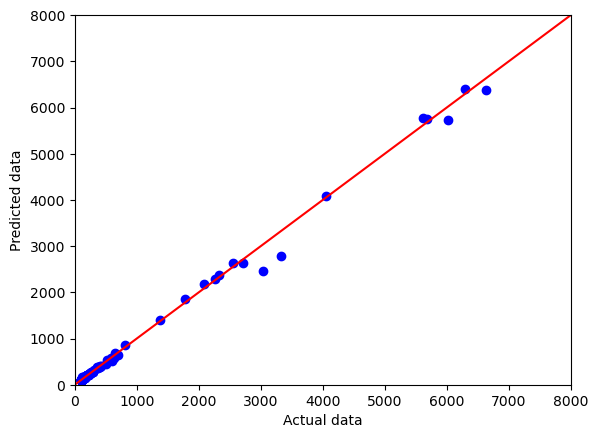

In [11]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,8000],[0,8000], color = "red")
plt.axis ([0,8000,0,8000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

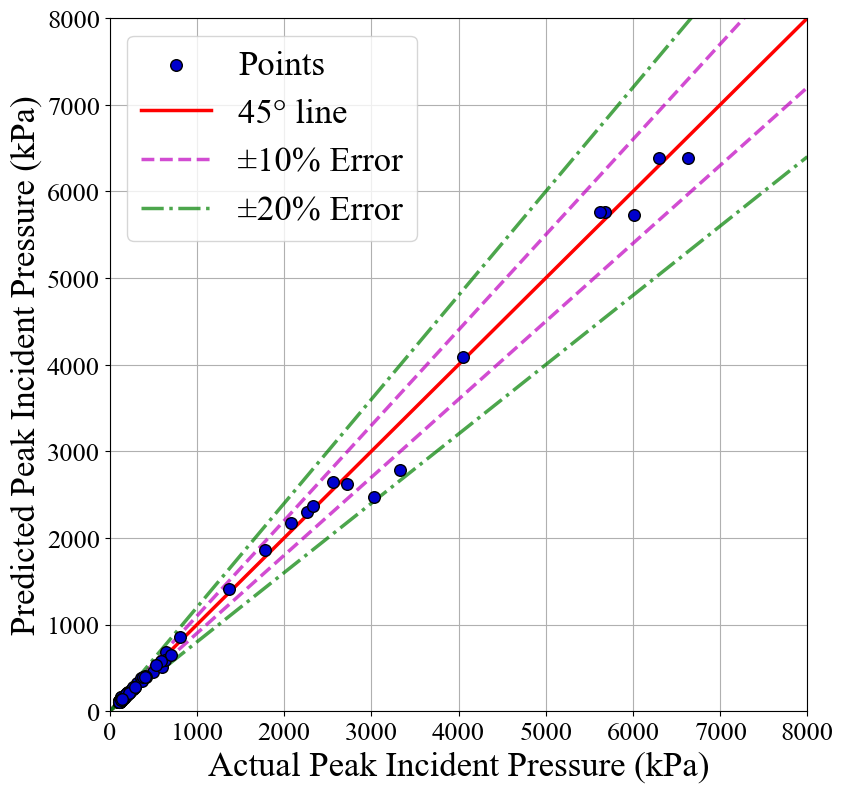

In [23]:
from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test
# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,8000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 8000)
plt.xlim(0, 8000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax.annotate("Adj.R$^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

plt.savefig('Images/plotX1.png', dpi = 600, bbox_inches = 'tight')

## Error margins

In [13]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 97.18%
Within 20% margin 98.87%
Out of 20% margin 1.13%


## <500 kPa

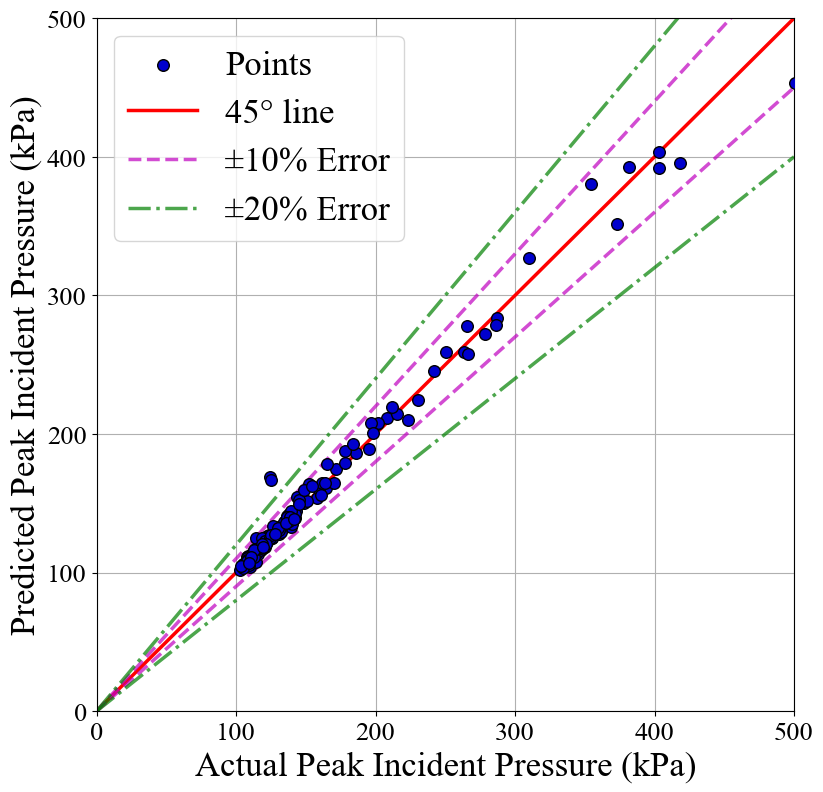

In [14]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test
# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (300, 100),fontsize = 25)  #Model is called here

plt.savefig('plotX2.png', dpi = 600, bbox_inches = 'tight')

## Save the model to disk

In [19]:
import pickle
filename = 'finalized_model_XGB.sav'
pickle.dump(regressor, open(filename, 'wb'))

## Make new predictions

In [ ]:
%%timeit -r 1 -n 1
comp_data = pd.read_excel('ForPaperComparison.xlsx')
print (comp_data)
#comp_data = np.array(ct.fit_transform(comp_data))
#print (comp_data)
comp_data_pred = regressor.predict(comp_data)
print (comp_data_pred)